### Imports

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint

In [7]:
%matplotlib inline 
plt.set_loglevel("info")

In [8]:
from pymoo.visualization.scatter import Scatter

In [9]:
from pymooCFD.core.minimizeCFD import MinimizeCFD
from pymooCFD.problems.rans_k_eps import RANS_k_eps

In [10]:
study = MinimizeCFD(RANS_k_eps)
# from setupOpt import optRun
# from pymooCFD.studies.oscillCyl_soo import optRun
#from pymooCFD.studies.compDistOpt_x2 import optRun
#from pymooCFD.studies.oscillCyl_x2 import optRun
# from pymooCFD.studies.oscillCyl_x2 import optRun
# from pymooCFD.studies.compDistOpt_x2 import optRun

04-25 16:54:14 :: INFO     :: optStudy-RANS_k_eps :: ~~~~~~~~~~~~~~~~~~~~~~~~~~
04-25 16:54:14 :: INFO     :: optStudy-RANS_k_eps :: INITIALIZING - Pickle Path
04-25 16:54:14 :: INFO     :: optStudy-RANS_k_eps :: 	CHECKPOINT LOADED: optStudy-RANS_k_eps/MinimizeCFD.checkpoint.npy
04-25 16:54:14 :: DEBUG    :: optStudy-RANS_k_eps :: 	RESTART DICTONARY
04-25 16:54:14 :: DEBUG    :: optStudy-RANS_k_eps :: 		opt_runs: []
04-25 16:54:14 :: DEBUG    :: optStudy-RANS_k_eps :: 		case_runs: []
04-25 16:54:14 :: DEBUG    :: optStudy-RANS_k_eps :: 		CFDCase: <class 'pymooCFD.problems.rans_k_eps.RANS_k_eps'>
04-25 16:54:14 :: DEBUG    :: optStudy-RANS_k_eps :: 		CFDGeneticAlgorithm: <class 'pymooCFD.core.pymooBase.CFDGeneticAlgorithm'>
04-25 16:54:14 :: DEBUG    :: optStudy-RANS_k_eps :: 		CFDGeneticProblem: <class 'pymooCFD.core.pymooBase.CFDGeneticProblem'>
04-25 16:54:14 :: DEBUG    :: optStudy-RANS_k_eps :: 		abs_path: /media/ydubief/M2CE-14TB-1/gitrepo/pymooCFD/optStudy-RANS_k_eps
04-25 16:54:

[<pymooCFD.core.optRun.OptRun object at 0x7fe830c87dc0>, <pymooCFD.core.optRun.OptRun object at 0x7fe830c909d0>]
<class 'pymooCFD.core.picklePath.PicklePath'>
[<class 'pymooCFD.core.optRun.OptRun'>, <class 'pymooCFD.core.picklePath.PicklePath'>, <class 'object'>]
(<class 'pymooCFD.core.optRun.OptRun'>, <class 'pymooCFD.core.picklePath.PicklePath'>, <class 'object'>)
opt_runs 0 <pymooCFD.core.optRun.OptRun object at 0x7fe830c87dc0>
!!!!!!!!!!!!!


KeyboardInterrupt: Interrupted by user

In [12]:
from IPython.display import Image, display
import glob

def showImages(listOfImageNames, **kwargs):
    if isinstance(listOfImageNames, str):
        listOfImageNames = [listOfImageNames]
    listOfImageNames = [os.path.abspath(os.path.join(optRun.optDatDir, imageName)) 
                            for imageName in listOfImageNames if optRun.optDatDir not in imageName]
    listOfImageNames = [glob.glob(imageName) for imageName in listOfImageNames]
    listOfImageNames = [item for sublist in listOfImageNames for item in sublist]
    print('Showing Images')
    print(listOfImageNames)
    for imageName in listOfImageNames:
        print('DISPLAYING:', imageName)
        display(Image(filename=imageName), **kwargs)
        

In [13]:
opt_run = study.opt_runs[0]

### Check Out Data Generated

In [14]:
print(opt_run.algorithm.history)
len(opt_run.algorithm.history)

None


TypeError: object of type 'NoneType' has no len()

In [37]:
pprint(study.__dict__)

{'CFDCase': <class 'pymooCFD.problems.rans_k_eps.RANS_k_eps'>,
 'CFDGeneticAlgorithm': <class 'pymooCFD.core.pymooBase.CFDGeneticAlgorithm'>,
 'CFDGeneticProblem': <class 'pymooCFD.core.pymooBase.CFDGeneticProblem'>,
 'abs_path': '/gpfs1/home/g/l/glove1/gitrepo/pymooCFD/optStudy-RANS_k_eps',
 'case_runs': [<pymooCFD.problems.rans_k_eps.RANS_k_eps object at 0x7f2b7b7724a0>,
 'cp_init': True,
 'log_level': 10,
 'logger': <Logger optStudy-RANS_k_eps (DEBUG)>,
 'opt_runs': [<pymooCFD.core.optRun.OptRun object at 0x7f2b7b7b0400>,
              <pymooCFD.core.optRun.OptRun object at 0x7f2b7b7b2cb0>]}


In [42]:
pprint(opt_run.algorithm.__dict__)

{'advance_after_initial_infill': True,
 'callback': <pymooCFD.core.pymooBase.PymooCFDCallback object at 0x7f2b7c48d4b0>,
 'data': {},
 'default_termination': <pymoo.util.termination.default.MultiObjectiveDefaultTermination object at 0x7f2b7c1fdc00>,
 'display': <pymooCFD.core.pymooBase.MyDisplay object at 0x7f2b7b7b2950>,
 'eliminate_duplicates': <pymoo.core.duplicate.DefaultDuplicateElimination object at 0x7f2b7b7a3310>,
 'evaluator': <pymoo.core.evaluator.Evaluator object at 0x7f2b7b7a3ac0>,
 'has_terminated': None,
 'history': None,
 'initialization': <pymoo.core.initialization.Initialization object at 0x7f2b7b7a3910>,
 'is_initialized': False,
 'mating': <pymoo.core.mating.Mating object at 0x7f2b7b7a36a0>,
 'n_gen': None,
 'n_offsprings': 4,
 'off': None,
 'opt': None,
 'pf': True,
 'pop': None,
 'pop_size': 30,
 'problem': <pymooCFD.core.pymooBase.CFDGeneticProblem object at 0x7f2b7c48d090>,
 'repair': <pymoo.core.repair.NoRepair object at 0x7f2b7b7a3d90>,
 'return_least_infeasibl

In [43]:
pprint(opt_run.problem.__dict__)

{'BaseCase': <class 'pymooCFD.problems.rans_k_eps.RANS_k_eps'>,
 '_ideal_point': None,
 '_nadir_point': None,
 '_pareto_front': <pymoo.util.cache.Cache object at 0x7f2b7c1ff640>,
 '_pareto_set': <pymoo.util.cache.Cache object at 0x7f2b7c48d030>,
 'callback': None,
 'check_inconsistencies': True,
 'data': {},
 'exclude_from_serialization': [],
 'gen1Pop': None,
 'n_constr': 1,
 'n_obj': 2,
 'n_var': 2,
 'replace_nan_values_by': inf,
 'validated': False,
 'xl': array([7.2e-02, 1.0e+03]),
 'xu': array([1.08e-01, 1.00e+04])}


In [ ]:
# for key in optRun.__dict__:
#     pprint("{0:15} : {1}".format(key, optRun.__dict__[key])) #str(optRun.__dict__[key]).replace('\n', '\n\t\t  ')))

In [ ]:
# for key in optRun.__dict__:
#     val = str(optRun.__dict__[key]).replace('\n', '\n\t\t')
#     pprint("{0:15} : {1}".format(key, val))

# Pre-Process Optimization Study

### Test Case

In [44]:
print(optRun.test_case)
optRun.test_case

Directory: ../../../../../gpfs1/home/g/l/glove1/gitrepo/pymooCFD/optStudy-RANS_k_eps/run01/test_case | Parameters: [0.09, 5500]


In [45]:
pprint(optRun.test_case.__dict__)

{'_f': None,
 '_g': None,
 '_x': [0.09, 5500],
 'abs_path': '/gpfs1/home/g/l/glove1/gitrepo/pymooCFD/optStudy-RANS_k_eps/run01/test_case',
 'cp_init': False,
 'datFile': 'residuals.dat',
 'inputFile': 'exec.jou',
 'jobFile': 'jobslurm.sh',
 'log_level': 10,
 'logger': <Logger optStudy-RANS_k_eps.run01.test_case (DEBUG)>,
 'meshFile': None,
 'meshSF': 1.0,
 'mesh_study': <pymooCFD.core.meshStudy.MeshStudy object at 0x7f2b7b772710>,
 'msCases': None,
 'numElem': None,
 'obj_labels': ['Average of Residuals', 'Wall Time'],
 'restart': False,
 'solnTime': None,
 'validated': False,
 'var_labels': ['Turbulent Viscosity Constant', 'Number of Iterations']}


In [46]:
print(optRun.test_case.msCases)

None


In [47]:
if optRun.test_case.msCases is None:
    print('No Mesh Study Cases for Test Case')
else:
    for case in optRun.test_case.msCases:
        pprint(case.__dict__)
        print()

No Mesh Study Cases for Test Case


In [48]:
if optRun.test_case.msCases is None:
    print('No Mesh Study Cases for Test Case')
else:
    print('Mesh Size Factors:', optRun.test_case.meshSFs)

No Mesh Study Cases for Test Case


In [49]:
if optRun.test_case.msCases is None:
    print('No Mesh Study Cases for Test Case')
else:
    for case in optRun.test_case.msCases:
        print(case)
        print('\t Objectives:', case._f)
#     print('\tParameters:', case._x, '\t Objectives:', case._f)

No Mesh Study Cases for Test Case


##### Update Test Case

In [50]:
# optRun.appendMeshSFs(optRun.test_case, [1.2])

In [51]:
# newMeshSFs = np.round(np.arange(0.3, 1.5, 0.1))
# optRun.saveCP()
# optRun.test_case.meshSFs

### Corner Case

In [52]:
# print(optRun.cornerCases)

In [53]:
# runCCDir = os.path.join(procOptDir, 'runCC')
# ents = os.listdir(runCCDir)
# CCobjs = []
# CCvars = []
# for ent in ents:
#     CCDir = os.path.join(runCCDir, ent)
#     varPath = os.path.join(CCDir, 'var.txt')
#     CCvars.append(np.loadtxt(varPath))
#     objPath = os.path.join(CCDir, 'obj.txt')
#     CCobjs.append(np.loadtxt(objPath))
# CCobjs = np.array(CCobjs)
# CCvars = np.array(CCvars)
# labels = [f'cc-{i}' for i in range(len(CCvars))]

In [54]:
# CCvars = [case.x for case in optRun.cornerCases]

In [55]:
# plot = Scatter(title= 'Design Space: Corner Cases', legend = True, labels = optRun.BaseCase.var_labels, grid=True)
# for i, CCvar in enumerate(CCvars):
#     plot.add(CCvar, label=f'cc-{i}')
# plot.show()

In [56]:
# CCobjs = [case.f for case in optRun.cornerCases]

In [57]:
# plot = Scatter(title= 'Objective Space: Corner Cases', legend = True, labels = optRun.BaseCase.obj_labels)
# for i, CCobj in enumerate(CCobjs):
#     plot.add(CCobj, label=f'cc-{i}')
# plot.show()

In [58]:
# # Non-dominated Sorting of Corner Cases
# n_survive = 1
# F = CCobjs
# X = CCvars
# from pymoo.util.nds.non_dominated_sorting import NonDominatedSorting
# nds = NonDominatedSorting()
# # do the non-dominated sorting until splitting front
# fronts = nds.do(F, n_stop_if_ranked=n_survive)
# front = fronts[0]
# nonDom_CCobj = F[front, :][0]
# nonDom_CCvar = X[front, :][0]
# print('Non-dominated: Corner Cases')
# print('Parameters-', nonDom_CCvar)
# print('Objectives-', nonDom_CCobj)

### Boundary Cases

In [65]:
print(opt_run.bnd_cases)

[<pymooCFD.problems.rans_k_eps.RANS_k_eps object at 0x7f2b7b7a3100>, <pymooCFD.problems.rans_k_eps.RANS_k_eps object at 0x7f2b7b772b00>, <pymooCFD.problems.rans_k_eps.RANS_k_eps object at 0x7f2b7b772c20>, <pymooCFD.problems.rans_k_eps.RANS_k_eps object at 0x7f2b7b772650>]


In [67]:
if opt_run.bnd_cases is not None:
    for case in opt_run.bnd_cases:
        print(case)

Directory: ../../../../../gpfs1/home/g/l/glove1/gitrepo/pymooCFD/optStudy-RANS_k_eps/run01/boundary-cases/0.072_1e+03 | Parameters: [7.2e-02 1.0e+03]
Directory: ../../../../../gpfs1/home/g/l/glove1/gitrepo/pymooCFD/optStudy-RANS_k_eps/run01/boundary-cases/0.072_1e+04 | Parameters: [7.2e-02 1.0e+04]
Directory: ../../../../../gpfs1/home/g/l/glove1/gitrepo/pymooCFD/optStudy-RANS_k_eps/run01/boundary-cases/0.108_1e+03 | Parameters: [1.08e-01 1.00e+03]
Directory: ../../../../../gpfs1/home/g/l/glove1/gitrepo/pymooCFD/optStudy-RANS_k_eps/run01/boundary-cases/0.108_1e+04 | Parameters: [1.08e-01 1.00e+04]


In [69]:
if opt_run.bnd_cases is not None:
    bnd_vars = np.array([case.x for case in opt_run.bnd_cases])
    print(bnd_vars)

[[7.20e-02 1.00e+03]
 [7.20e-02 1.00e+04]
 [1.08e-01 1.00e+03]
 [1.08e-01 1.00e+04]]


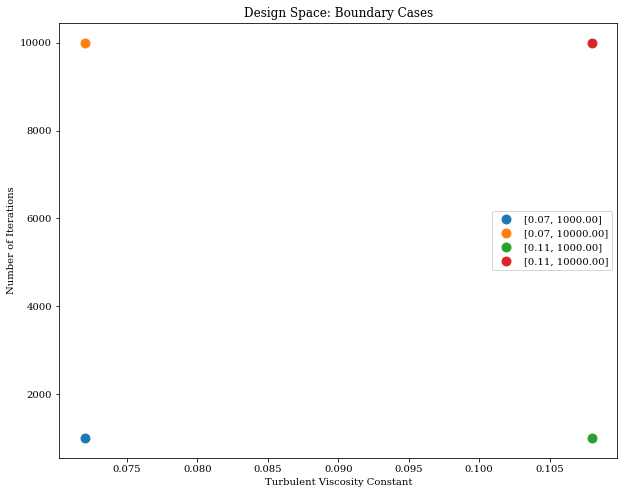

In [79]:
if opt_run.bnd_cases is not None:
    plot = Scatter(title='Design Space: Boundary Cases', 
                   legend=True,
                   labels=opt_run.problem.BaseCase.var_labels, 
                   figsize=(10,8)
                  )
    for var in bnd_vars:
        plot.add(var, label='[%.2f, %.2f]'%(var[0],var[1]), s=80)
#     path = os.path.join(opt_run.rel_path, 'boundary-cases', 'bndPts_plot-varSpace.png')
#     plot.save(path, dpi=100)
    plot.show()

In [80]:
if optRun.bndCases is not None:
    bndObjs = np.array([case.f for case in optRun.bndCases])
    print(bndObjs)

AttributeError: 'OptRun' object has no attribute 'bndCases'

In [ ]:
if optRun.bndCases is not None:
    plot = Scatter(title= 'Objective Space: Boundary Cases', 
                   legend = True, 
                   labels=optRun.BaseCase.obj_labels, 
                   figsize=(10,8)
                  )
    for obj in bndObjs:
        plot.add(obj, label='[%.2f, %.2f]'%(obj[0],obj[1]), s=70, alpha=1)
    path = os.path.join(optRun.runDir, 'boundary-cases', 'bndPts_plot-objSpace.png')
    plot.save(path, dpi=100)
    plot.show()

In [ ]:
if optRun.bndCases is not None:
    # Non-dominated Sorting of Boundary Cases
    n_survive = 1
    F = np.array([case.f for case in optRun.bndCases])
    X = np.array([case.x for case in optRun.bndCases])
    from pymoo.util.nds.non_dominated_sorting import NonDominatedSorting
    nds = NonDominatedSorting()
    # do the non-dominated sorting until splitting front
    fronts = nds.do(F, n_stop_if_ranked=n_survive)
    front = fronts[0]
    nonDom_CCobj = F[front, :][0]
    nonDom_CCvar = X[front, :][0]
    print('Non-dominated: Boundary Cases')
    print('Parameters-', nonDom_CCvar)
    print('Objectives-', nonDom_CCobj)

### Mesh Studies

### Generation 1

In [ ]:
print(len(optRun.algorithm.history))
print(optRun.algorithm.history)

In [ ]:
print(len(optRun.algorithm.history[0].pop))

##### Generation 1: Parameter Space

In [ ]:
# optRun.plotDir = os.path.join(optRun.optDatDir, 'plots')
# os.mkdir(optRun.plotDir)
# optRun.BaseCase.var_labels = ['Number of Tasks', 'Number of CPUs per Task']
# print(optRun.BaseCase.var_labels)

In [ ]:
popX = optRun.algorithm.history[0].pop.get('X')
gen = optRun.algorithm.history[0].n_gen
if len(popX) <= 10:
    leg = True
else:
    leg = False
plot = Scatter(title=f'Generation {gen} Design Space', 
               legend=leg, 
               labels=optRun.BaseCase.var_labels,
#                figsize=(10,8)
              )
for ind_i, ind in enumerate(popX):
    plot.add(ind, label=f'IND {ind_i+1}')
# save parameter space plot
plot.save(os.path.join(optRun.plotDir, 'gen1_var_space.png'), dpi=100)
plot.show()

##### Generation 1: Objective Space

In [ ]:
popF = optRun.algorithm.history[0].pop.get('F')
gen = optRun.algorithm.history[0].n_gen
if len(popF) <= 10:
    leg = True
else:
    leg = False
plot = Scatter(title=f'Generation {gen} Objective Space', 
               legend=leg, 
               labels=optRun.BaseCase.obj_labels
              )
for ind_i, ind in enumerate(popF):
    plot.add(ind, label=f'IND {ind_i+1}')
# save parameter space plot
plot.save(os.path.join(optRun.plotDir, 'gen1_obj_space.png'), dpi=100)
print(os.path.join(optRun.plotDir, 'gen1_obj_space.png'))
plot.show()

####

##### Generation 1: Examine Parameter to Objective Space Mapping
Plot every parameter and objective against each other 

In [ ]:
# optRun.mapDir = os.path.join(optRun.optDatDir, 'mapGen1')
# print(optRun.mapDir)
# os.makedirs(optRun.mapDir, exist_ok=True)
# optRun.mapDir = 'optRun-OscillCylinderOpt/run/mapGen1'
# optRun.saveCP()


In [ ]:
#%%capture
# ^ suppresses output
from scipy.stats import linregress
##### Variable vs. Objective Plots ######
# extract objectives and variables columns and plot them against each other
var_labels = optRun.BaseCase.var_labels
obj_labels = optRun.BaseCase.obj_labels
popX = optRun.algorithm.history[0].pop.get('X').astype(float)
popF = optRun.algorithm.history[0].pop.get('F').astype(float)
mapPaths = []
# plots = []
fig = plt.figure(figsize=(10,8))
for x_i, x in enumerate(popX.transpose()):
    for f_i, f in enumerate(popF.transpose()):
        plot = Scatter(title=f'{var_labels[x_i]} vs. {obj_labels[f_i]}',
                       labels=[var_labels[x_i], obj_labels[f_i]], 
#                        figsize=(10,8)
#                        legend = True,
                      )
        xf = np.column_stack((x,f))
        plot.add(xf)
        
        ### Linear best fit line 
#         m, b, r_value, p_value, std_err = linregress(x, f)
#         r_squared = r_value**2
#         xy = np.column_stack((x, m*x+b))
#         plot.n_dim = 2
#         plot._do()
#         plot.plot(plot.ax, 'line', xy, label='Best Linear Fit', c='r')
#         plot.ax.text(min(xf[:,0]), max(xf[:,1]), 'Best Linear Fit', 
#                      horizontalalignment='left',
#                      c = 'r',
#                      size = 16
#                     )
#         plot.ax.text(max(xf[:,0]), max(xf[:,1]), r'$r^2$={0:.4f}'.format(r_squared), 
#                      horizontalalignment='right',
#                      c = 'r',
#                      size = 16
#                     )

        ### Polynomial best fit lines
        plot.do()
        plot.legend = True
        c = ['r', 'g', 'm']
        for d in range(1, 3+1):
            coefs = np.polyfit(x, f, d)
            y = np.polyval(coefs, x)
            xy = np.column_stack((x, y))
            xy = xy[xy[:, 0].argsort()]
#             correlation = np.corrcoef(x, y)[0, 1]
#             r_squared = correlation**2
#             if d == 1:
#                 label = 'Order %i Best Fit, $r^2$=%.2g' %(d, r_squared)
#             else:
#                 label = f'Order {d} Best Fit'
            label = f'Order {d} Best Fit'
#             plot.add(xy, label=f'Order {d} Best Fit', marker='x')
            plot.ax.plot(xy[:,0], xy[:,1], label=label, c=c[d-1])
        plot.do()
        var_str = var_labels[x_i].replace(" ", "_").replace("/", "|").replace('%', 'precentage').replace("\\", "|")
        obj_str = obj_labels[f_i].replace(" ", "_").replace("/", "|").replace('%', 'precentage').replace("\\", "|")
        fName = f'{var_str}-vs-{obj_str}.png'
        path = os.path.join(optRun.mapDir, fName)
        mapPaths.append(path)
        print(path)
#         plots.append(plot)
        plot.save(path, dpi=100)
#         plot.show()
#         ax = fig.add_subplot(111).add_axes(plot.ax)
#         ax = plot.ax
# fig.show()
# fig, axes = plt.subplots(2,2)
# print(fig)
# for row in axes:
#     for ax in row:
#         print(ax)
#         ax = plots[0].ax
#         print(ax)
# for row in axes:
#     for ax in row:
# #         ax = plots[0]
#         print(ax)
# print(plots[0].ax)
# fig = plt.figure()
# for i, plot in enumerate(plots):
#     ax = fig.add_subplot(int(f'{i+1}11'))
#     ax.text(1,1,i)
    
    

# len_ax = round(len(plots)/2)
# fig, ax = plt.subplots(len_ax,len_ax)
# c = 0
# for i in range(len_ax):
#     for j in range(len_ax):
#         if c <= len(plots):    
#             print(plots[c])
#             ax[i][j] = plots[c].ax
#             c += 1

In [ ]:
map_plots, map_paths = optRun.plotGen1()

#### Generation 1: Display Mapping
Remember that for each plot the parameters(s) not labeled are also varying. 

Therefore, if a strong relationship is seen in these plots then it is likely a relationship independent of the other variable.


In [ ]:
from IPython.display import Image, display
for path in map_paths:
    display(Image(filename=path))

# Post-Process Optimization Study

### Optimization Algorithm Convergence

In [81]:
#hist = optRun.algorithm.history
#print(hist)
#print(optRun.algorithm.callback)
#for alg in hist:
#    print(alg)
#    print(alg.callback)
# n_evals = np.array([e.evaluator.n_eval for e in hist])
# print('Number of Evaluations:', n_evals)

In [83]:
opt_avg = []
for h in opt_run.algorithm.history:
    F_opt = np.array([o.F for o in h.opt])
    F_avg = np.mean(F_opt, axis=0)
    #print(F_avg)
    opt_avg.append(F_avg)
opt_avg = np.array(opt_avg)

TypeError: 'NoneType' object is not iterable

In [ ]:
n_gen = [alg.n_gen for alg in optRun.algorithm.history]
for obj_i in range(optRun.BaseCase.n_obj):
#     print(opt_sum)
    opt_obj = opt_avg[:,obj_i]
#     print(opt_obj)
    plt.suptitle('Convergence of Objective Mean')
    plt.title(f'Objective {obj_i+1}: {obj_labels[obj_i]}')
#     plt.plot(n_evals, opt_obj, "--")
    plt.plot(n_gen, opt_obj, "--")
    plt.xlabel('Number of Generations')
    plt.ylabel('Mean of Optimum Objectives')
#     plt.yscale("log")
    plt.savefig(os.path.join(optRun.plotDir, f'convergence-obj{obj_i}')) #_{obj_labels[obj_i]}'))
    plt.show()

In [ ]:
opt_minL = 1000
hist = optRun.algorithm.history
for h in hist:
    l = len(h.opt)
    if l < opt_minL:
        opt_minL = l
print('Optimum minimum length:', opt_minL)
opt_sum = []
for h in hist:
    F_opt = np.array([o.F for o in h.opt[:opt_minL]])
    F_sum = np.sum(F_opt, axis=0)
#     print(F_sum)
    opt_sum.append(F_sum)
opt_sum = np.array(opt_sum)

In [ ]:
n_gen = [alg.n_gen for alg in optRun.algorithm.history]
for obj_i in range(optRun.BaseCase.n_obj):
#     print(opt_sum)
    opt_obj = opt_sum[:,obj_i]
#     print(opt_obj)
    plt.suptitle('Convergence of Objective Sum')
    plt.title(f'Objective {obj_i+1}: {obj_labels[obj_i]}')
#     plt.plot(n_evals, opt_obj, "--")
    plt.plot(n_gen, opt_obj, "--")
    plt.xlabel('Number of Generations')
    plt.ylabel('Sum of Optimum Objectives')
#     plt.yscale("log")
    plt.savefig(os.path.join(optRun.plotDir, f'convergence-obj{obj_i}')) #_{obj_labels[obj_i]}'))
    plt.show()

In [ ]:
hist = optRun.algorithm.history


In [ ]:
opt = np.array([e.opt[0].F for e in hist])
n_gen = [alg.n_gen for alg in optRun.algorithm.history]
for obj_i in range(len(opt[0])):
    opt_obj = opt[:,obj_i]
#     print(opt_obj)
    plt.suptitle('Convergence of Optimum')
    plt.title(f'Objective {obj_i+1}: {obj_labels[obj_i]}')
#     plt.plot(n_evals, opt_obj, "--")
    plt.plot(n_gen, opt_obj, "--")
    plt.xlabel('Number of Generations')
    plt.ylabel('Optimum')
#     plt.yscale("log")
    plt.savefig(os.path.join(optRun.plotDir, f'convergence-obj{obj_i}')) #_{obj_labels[obj_i]}'))
    plt.show()

### Performance Indicator - Hypervolume
https://pymoo.org/misc/performance_indicator.html#Hypervolume

Maximize hypervolume from reference point. 

In [ ]:
all_obj = [alg.pop.get('F') for alg in hist]

In [ ]:
mean_all_obj = []
for obj_i in range(optRun.BaseCase.n_obj):
    mean_all_obj.append(np.mean([np.mean(obj_g[:,obj_i]) for obj_g in all_obj]))
print(mean_all_obj)

In [ ]:
mean_g1_obj = []
popF = hist[-1].pop.get('F')
for obj_i in range(optRun.BaseCase.n_obj):
    mean_g1_obj.append(np.mean(popF[:,obj_i]))
print(mean_g1_obj)

In [ ]:
ref_pt = [4, 4]
ref_pt = mean_g1_obj
ref_pt = mean_all_obj
sf = 100000
ref_pt = [mean_obj*sf for mean_obj in mean_g1_obj]

In [ ]:
from pymoo.factory import get_performance_indicator
hv = get_performance_indicator("hv", ref_point=np.array(ref_pt))

In [ ]:
for gen, alg in enumerate(optRun.algorithm.history):
    print('Generation', gen+1, f"hypervolume {hv.do(alg.pop.get('X'))}")

### Latest Generation 

In [ ]:
max_disp_len = 10

In [ ]:
if len(optRun.algorithm.pop.get('X')) < max_disp_len:
    print('FINAL POPULATION')
    print('Parameters')
    print(optRun.algorithm.pop.get('X'))
    print('Objectives')
    print(optRun.algorithm.pop.get('F'))

In [ ]:
latest_pop = optRun.algorithm.history[-1].pop
latest_popX = latest_pop.get('X')
latest_popF = latest_pop.get('F')

In [ ]:
plot = Scatter(title='Latest Generations Design Space', legend=False, labels=optRun.BaseCase.var_labels)
for ind_i, ind in enumerate(latest_popX):
    plot.add(ind, label=f'IND {ind_i+1}')
# save parameter space plot
plot.save(os.path.join(optRun.plotDir, 'latest_var_space.png'), dpi=100)
plot.show()

In [ ]:
plot = Scatter(title='Latest Generations Objective Space', 
               legend=False, 
               labels=optRun.BaseCase.obj_labels,
               s=60,
               alpha=0.9
              )
for ind_i, ind in enumerate(latest_popF):
    plot.add(ind, label=f'IND {ind_i+1}')
# save objective space plot
plot.save(os.path.join(optRun.plotDir, 'latest_obj_space.png'), dpi=100)
plot.show()

### Optimum

In [ ]:
assert optRun.algorithm.opt is not None
print('Number of Optimum:', len(optRun.algorithm.opt))

In [ ]:
# optRun.BaseCase.var_labels = ["Amplitude [radians/s]", "Frequency [cycles/s]", "Reynolds Number"]
print(optRun.BaseCase.var_labels)
print()
labels = ["Amplitude", "Frequency", "Reynolds Number"]
labels = ["Amplitude [radians/s]", "Frequency [cycles/s]", "Reynolds Number"]
n_dim = len(optRun.BaseCase.var_labels)
labels_proc = [f"${labels}_{{{i}}}$" for i in range(1, n_dim + 1)]
if isinstance(labels, list):
    print(labels)
    
print(labels_proc)

In [ ]:
#optRun.BaseCase.var_labels = optRun.BaseCase.var_labels.tolist()

In [ ]:
n_opt_disp = 50

In [ ]:
# opt_pop = optRun.algorithm.opt[:n_opt_disp]
# gen = optRun.algorithm.n_gen
# if len(opt_pop) < 20:
#     leg = True
# else:
#     leg = False
# varPlot = Scatter(title=f'{optRun.optName}: Optimum - Generation {gen} - Design Space', 
#                   figsize=(10,8),
#                   labels=optRun.BaseCase.var_labels[::2],
#                   legend=leg
#                  )
# #varPlot.axis_labels = optRun.BaseCase.var_labels
# for opt_i, opt in enumerate(opt_pop):
#     varPlot.add(opt.get('X')[::2], label=f'opt{opt_i}', s=70)
# varPlot.save(os.path.join(optRun.plotDir, f'optimum-gen{gen}-varSpace-Re-Amp.png'), dpi=100)
# varPlot.show()

In [ ]:
# opt_pop = optRun.algorithm.opt[:n_opt_disp]
# gen = optRun.algorithm.n_gen
# if len(opt_pop) < 20:
#     leg = True
# else:
#     leg = False
# varPlot = Scatter(title=f'{optRun.optName}: Optimum - Generation {gen} - Design Space', 
#                   figsize=(10,8),
#                   labels=optRun.BaseCase.var_labels[:2],
#                   legend=leg
#                  )
# #varPlot.axis_labels = optRun.BaseCase.var_labels
# for opt_i, opt in enumerate(opt_pop):
#     varPlot.add(opt.get('X')[:2], label=f'opt{opt_i}', s=70)
# varPlot.save(os.path.join(optRun.plotDir, f'optimum-gen{gen}-varSpace-freq-Amp.png'), dpi=100)
# varPlot.show()

In [ ]:
# opt_pop = optRun.algorithm.opt[:n_opt_disp]
# gen = optRun.algorithm.n_gen
# if len(opt_pop) < 20:
#     leg = True
# else:
#     leg = False
# varPlot = Scatter(title=f'{optRun.optName}: Optimum - Generation {gen} - Design Space', 
#                   figsize=(10,8),
#                   labels=optRun.BaseCase.var_labels[1:],
#                   legend=leg
#                  )
# #varPlot.axis_labels = optRun.BaseCase.var_labels
# for opt_i, opt in enumerate(opt_pop):
#     varPlot.add(opt.get('X')[1:], label=f'opt{opt_i}', s=70)
# varPlot.save(os.path.join(optRun.plotDir, f'optimum-gen{gen}-varSpace-Re-freq.png'), dpi=100)
# varPlot.show()

In [ ]:
opt_pop = optRun.algorithm.opt[:n_opt_disp]
gen = optRun.algorithm.n_gen
if len(opt_pop) < 20:
    leg = True
else:
    leg = False
varPlot = Scatter(title=f'{optRun.optName}: Optimum - Generation {gen} - Design Space', 
                  figsize=(10,8),
                  labels=optRun.BaseCase.var_labels,
                  legend=leg
                 )
varPlot.axis_labels = optRun.BaseCase.var_labels
for opt_i, opt in enumerate(opt_pop):
    varPlot.add(opt.get('X'), label=f'opt{opt_i}', s=70)
varPlot.save(os.path.join(optRun.plotDir, f'optimum-gen{gen}-varSpace.png'), dpi=100)
varPlot.show()

In [ ]:
opt_pop = optRun.algorithm.opt[:n_opt_disp]
gen = optRun.algorithm.n_gen
if len(opt_pop) < 20:
    leg = True
else:
    leg = False
plot = Scatter(title=f'{optRun.optName}: Optimum - Generation {gen} - Objective Space', 
                  figsize=(10,8),
                  labels=optRun.BaseCase.obj_labels,
                  legend=leg
                 )
for opt_i, opt in enumerate(opt_pop):
    plot.add(opt.get('F'), label=f'opt{opt_i}', s=70)
plot.save(os.path.join(optRun.plotDir, f'optimum-gen{gen}-objSpace.png'), dpi=100)
plot.show()

### Print Every Generation

In [41]:
if optRun.algorithm.n_gen < 10 and len(optRun.algorithm.pop.get('X')) < 10:
    print('EVERY GENERATION')
    for gen in range(algorithm.n_gen):
        print(f'generation {gen}')
        var_g = algorithm.callback.data['var'][gen]
        obj_g = algorithm.callback.data['obj'][gen]
        for ind in range(len(var_g)):
            var_i = var_g[ind]
            obj_i = obj_g[ind]
            print(f'ind{ind}: ', end='')
            for n in range(len(var_i)):
                print(f'{var_labels[n]}: {var_i[n]}', end=' ')
            print(' // ', end='')
            for n in range(len(obj_i)):
                print(obj_labels[n] + ':' + '%.3f' % obj_i[n], end=' ')
            print()

TypeError: '<' not supported between instances of 'NoneType' and 'int'

### All Design Points

In [ ]:
if opt_run.BaseCase.n_var > 3: # plot without labels
    print('CAN NOT REPRESENT DESIGN SPACE IN 3D. USING ')
    plot = Scatter()
    plot.add(algorithm.pop.get('X')[:10])

# All design points
else: 
    if opt_run.algorithm.n_gen < 15:
        leg = True
    else:
        leg = False
    plot = Scatter(title='Entire Design Space', legend=leg, labels=var_labels)
    for g, alg in enumerate(hist):
        plot.add(alg.pop.get('X'), label=f'GEN {g+1}')

# save plot to png file
plot.save(os.path.join(opt_run.plotDir, 'entire_design_space.png'), dpi=100)
plot.show()

### All Objective Points

In [ ]:
if opt_run.algorithm.n_gen < 15:
    leg = True
else:
    leg = False
plot = Scatter(title='Entire Objective Space', legend=leg, labels=obj_labels)
for g, alg in enumerate(hist):  # range(algorithm.n_gen)
#     if g == 0:
#         continue
    plot.add(alg.pop.get('F'), label=f'GEN {g+1}')
# if pf is not None:
#     plot.add(pf, plot_type="line", color="black", alpha=0.7)
plot.save(os.path.join(opt_run.plotDir, 'entire_obj_space.png'), dpi=100)
plot.show()

In [ ]:
algs = optRun.algorithm.history
algs = algs[1:]
optRun.plotOptSpaces(algs, 'no_gen1')

In [ ]:
def plotOptSpaces(self, algs, fileName, folder=None , maxLegLen=15):
    if folder is None:
        folder = self.plotDir
    if len(algs) < maxLegLen:
        leg = True
    else:
        leg = False
    obj_plot = Scatter(title='Objective Space', legend=leg, labels=self.BaseCase.obj_labels)
    var_plot = Scatter(title='Design Space', legend=leg, labels=self.BaseCase.var_labels)
    for g, alg in enumerate(algs):  # range(algorithm.n_gen)
        obj_plot.add(alg.pop.get('F'), label=f'GEN {g+1}')
        var_plot.add(alg.pop.get('X'), label=f'GEN {g+1}')
    obj_plot.save(os.path.join(folder, fileName+'-obj_space.png'), dpi=100)
    var_plot.save(os.path.join(folder, fileName+'-var_space.png'), dpi=100)
    #plot.show()

### Last 10 Generation of Parameter Space

In [ ]:
# Last 10 generations
# last 10 gens. design points
hist = optRun.algorithm.history
if optRun.algorithm.n_gen > 10:
    #### Design Space ####
    if optRun.BaseCase.n_var > 3: # plot without labels
        print('CAN NOT REPRESENT OBJECTIVE SPACE IN 3D. Using Pairwise Scatter Plots')
        plot = Scatter(figsize=(10, 8))
        plot.add(algorithm.pop.get('X')[:10])
    # Last 10 generations of objective points
    else: 
        plot = Scatter(title='Last 10 Generations Design Space', legend=True, 
                       figsize=(10, 8),
                       labels=optRun.BaseCase.var_labels
                      )
        gen = len(hist)
        for g in range(gen-10, gen):
            plot.add(hist[g].pop.get('X'), label=f'GEN {g+1}',
                     alpha=0.8
                    )
    # save design space plot
    plot.save(os.path.join(optRun.plotDir, 'final_10_design_space.png'), dpi=100)
    plot.show()

### Last 10 Generation of Objective Space

In [ ]:
### Objective Space ####
if optRun.algorithm.n_gen > 10:
    if optRun.BaseCase.n_obj >3:
        plot = Scatter()
        plot.add(optRun.algorithm.pop.get('F')[:10])
    else:
        # last 10 gens. objective points
        plot = Scatter(title='Last 10 Generations Objective Space', 
                       legend=True, 
                       labels=optRun.BaseCase.obj_labels,
                       figsize=(10,8)
                      )
        gen = len(hist)
        for g in range(gen-10, gen):
            plot.add(hist[g].pop.get('F'), label=f'GEN {g+1}')

    # save objective space plot
    plot.save(os.path.join(optRun.plotDir, 'final_10_obj_space.png'), dpi=100)
    plot.show()

### Extract Data 

In [ ]:
checkpoint = optRun.algorithm

In [ ]:
# is the full history of the algorithm saved? 
print('Checkpoint Objective Population:\n', checkpoint.pop.get('F')[:5])
if np.all(checkpoint.pop.get('F')) is not None: 
    algorithm = checkpoint
    print('Checkpoint @ end of generation')
    print(f'     Generation - {algorithm.n_gen}, {algorithm.callback.gen}')
else:
    print('Checkpoint mid-generation')
    print('     "algorithm" variable represents last completed generation')
    print('     "algorithm.callback" unusable with history objects')
    algorithm = checkpoint.history[-1]
    print(f'     Generation - {algorithm.n_gen}, {algorithm.callback.gen}')

# Preperation for Continuation

In [ ]:
optRun.algorithm.termination

In [ ]:
from pymoo.factory import get_termination
term = get_termination('n_gen', 30)
print(term)

In [ ]:
# optRun.algorithm.termination = term
#optRun.saveCP()